## Evaluate Regression Models Exercises

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. 

By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle
from wrangle import wrangle_zillow

### Exercise 1):
Load your zillow dataset:

In [2]:
#Imputting zillow dataset, after it has been cleaning and split with a function found in wrangle.py file
train = wrangle.train
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,county
410426,3,2.0,1550,357034,1961,4418.72,Los Angeles County
533217,3,3.5,1800,287774,1996,2798.18,Orange County
695362,3,2.0,1542,588738,1923,7210.51,Los Angeles County
729442,3,1.0,1128,290984,1952,3622.02,Los Angeles County
524897,0,1.0,396,34541,1942,579.61,Los Angeles County


### Exercise 2):
Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.

Here is some sample code to get you started:


In [12]:
from sklearn.linear_model import LinearRegression

# Now we fit a regression model using OLS method.
# OLS = ordinary least squares.

# create the model object
lm = LinearRegression(normalize=True)

# fit the model to trainig data
lm.fit(train[['calculatedfinishedsquarefeet']], train.taxvaluedollarcnt)

# make prediction
train['yhat'] = lm.predict(train[['calculatedfinishedsquarefeet']])

train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,county,yhat
410426,3,2.0,1550,357034,1961,4418.72,Los Angeles County,357264.612498
533217,3,3.5,1800,287774,1996,2798.18,Orange County,399104.649483
695362,3,2.0,1542,588738,1923,7210.51,Los Angeles County,355925.731315
729442,3,1.0,1128,290984,1952,3622.02,Los Angeles County,286638.630067
524897,0,1.0,396,34541,1942,579.61,Los Angeles County,164131.001774
...,...,...,...,...,...,...,...,...
81672,3,2.5,2460,463327,1966,5183.18,Orange County,509562.347124
806068,2,1.5,1191,517777,1987,5353.78,Orange County,297182.319387
703366,3,2.0,1755,478054,1944,5785.01,Los Angeles County,391573.442826
798811,3,1.0,1188,72975,1947,482.63,Los Angeles County,296680.238943


### Exercise 3)
Plot the residuals for the linear regression model that you made.

In [15]:
#baseline aka mean, of taxvaluedollarcnt (y)
baseline = train.taxvaluedollarcnt.mean()
baseline

398734.9540404411

In [17]:
#adding baseline to the df
train['baseline'] = train.taxvaluedollarcnt.mean()
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,county,yhat,residual,baseline
410426,3,2.0,1550,357034,1961,4418.72,Los Angeles County,357264.612498,-230.612498,398734.95404
533217,3,3.5,1800,287774,1996,2798.18,Orange County,399104.649483,-111330.649483,398734.95404
695362,3,2.0,1542,588738,1923,7210.51,Los Angeles County,355925.731315,232812.268685,398734.95404
729442,3,1.0,1128,290984,1952,3622.02,Los Angeles County,286638.630067,4345.369933,398734.95404
524897,0,1.0,396,34541,1942,579.61,Los Angeles County,164131.001774,-129590.001774,398734.95404


In [19]:
# first creating residuals (ie residuals = actual - predicted)
train['residual'] = train.taxvaluedollarcnt - train.yhat
train['baseline_residual'] = train.taxvaluedollarcnt - train.baseline
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,county,yhat,residual,baseline,baseline_residual
410426,3,2.0,1550,357034,1961,4418.72,Los Angeles County,357264.612498,-230.612498,398734.95404,-41700.95404
533217,3,3.5,1800,287774,1996,2798.18,Orange County,399104.649483,-111330.649483,398734.95404,-110960.95404
695362,3,2.0,1542,588738,1923,7210.51,Los Angeles County,355925.731315,232812.268685,398734.95404,190003.04596
729442,3,1.0,1128,290984,1952,3622.02,Los Angeles County,286638.630067,4345.369933,398734.95404,-107750.95404
524897,0,1.0,396,34541,1942,579.61,Los Angeles County,164131.001774,-129590.001774,398734.95404,-364193.95404


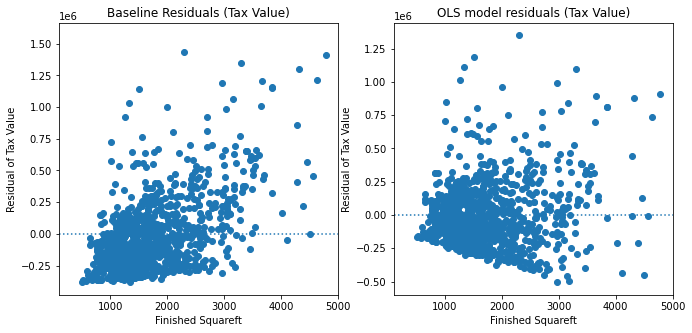

In [25]:
# residual plots (calculated finished square feet vs residual)

###METHODS USED:
#1) creating "sample", to view only a small portion--takes out the noise of
##stacked data so I can see the distribution happening

#2)plt.xlim() allows me to select the range of sqft
## this allows me to drop more of the outliers that still need to be addressed

sample = train.sample(1000)
plt.figure(figsize = (11,5))

plt.subplot(121)
plt.xlim(100,5000)
plt.scatter(sample.calculatedfinishedsquarefeet, sample.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('Finished Squareft')
plt.ylabel('Residual of Tax Value')
plt.title('Baseline Residuals (Tax Value)')

plt.subplot(122)
plt.xlim(100,5000)
plt.scatter(sample.calculatedfinishedsquarefeet, sample.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('Finished Squareft')
plt.ylabel('Residual of Tax Value')
plt.title('OLS model residuals (Tax Value)');

- <mark> TAKEAWAYS: The negative movement in the model shows that Finished squarefootage does not hold much weight when it comes to predicting house values.

### Exercise 4 & 5)
Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

Then, calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [26]:
# I first will calculate the square of residuals (makes it all positive)

train['residual^2'] = train.residual**2
train['baseline_residual^2'] = train.baseline_residual**2

train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,county,yhat,residual,baseline,baseline_residual,residual^2,baseline_residual^2
410426,3,2.0,1550,357034,1961,4418.72,Los Angeles County,357264.612498,-230.612498,398734.95404,-41700.95404,5.318212e+04,1.738970e+09
533217,3,3.5,1800,287774,1996,2798.18,Orange County,399104.649483,-111330.649483,398734.95404,-110960.95404,1.239451e+10,1.231233e+10
695362,3,2.0,1542,588738,1923,7210.51,Los Angeles County,355925.731315,232812.268685,398734.95404,190003.04596,5.420155e+10,3.610116e+10
729442,3,1.0,1128,290984,1952,3622.02,Los Angeles County,286638.630067,4345.369933,398734.95404,-107750.95404,1.888224e+07,1.161027e+10
524897,0,1.0,396,34541,1942,579.61,Los Angeles County,164131.001774,-129590.001774,398734.95404,-364193.95404,1.679357e+10,1.326372e+11


In [29]:
#SUM OF SQUARED ERRORS:
SSE = train['residual^2'].sum()
SSE_baseline = train['baseline_residual^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))
if SSE < SSE_baseline:
    print ('Model beats baseline')
else:
    print ('Baseline beats model')

SSE = 86976467113803984.0
SSE Baseline = 115464233692208544.0
Model beats baseline


In [30]:
#MEAN OF SQUARED ERROR:
MSE = SSE/len(train)
MSE_baseline = SSE_baseline/len(train)

print("MSE = ", "{:.1f}".format(MSE))
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))


MSE =  74150885118.4
MSE baseline =  98437835105.4


In [40]:
#TOTAL SUM OF SQUARES
TSS = SSE = train['residual^2'].sum()
TSS_baseline = SSE_baseline = train['baseline_residual^2'].sum()
print("TSS = ","{:.1f}".format(TSS)) 
print("TSS_baseline = ","{:.1f}".format(TSS_baseline))

TSS =  86976467113803984.0
TSS_baseline =  115464233692208544.0


In [41]:
#EXPLAINED SUM of SQUARES
ESS = TSS - SSE
ESS_baseline = TSS_baseline - SSE-baseline
print("ESS = ","{:.1f}".format(ESS))
print("ESS_baseline = ","{:.1f}".format(ESS_baseline))

ESS =  0.0
ESS_baseline =  28487766578005824.0


In [42]:
#ROOT MEAN SQUARED ERROR
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)


print("RMSE = ", "{:.1f}".format(RMSE))
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))


RMSE =  272306.6
RMSE baseline =  313748.0


### Exercise 6)
Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.


In [43]:
if SSE < SSE_baseline:
    print ('Model beats baseline')
else:
    print ('Baseline beats model')

Model beats baseline


### Exercise 7)
What is the amount of variance explained in your model?

In [44]:
from sklearn.metrics import r2_score
r2_score(train.taxvaluedollarcnt, train.yhat)

0.24672373138805925

### Exercise 8)
Is your model better than the baseline model?

<i><b>Yes, as the model squared error beat the baseline sse AND there is a very low variance r2 score.

### Exercise 9)
Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the 
  baseline model
- better_than_baseline(y, yhat): returns true if your model performs 
    better than the baseline, otherwise false
